# Предобработка данных

***Содержание работы***

1. Загрузите данные о пассажирах Титаника и познакомьтесь со структурой датасета.

2. Проведите анализ и визуализацию каждого признака датасета. Сделайте вывод о виде распределения и шкале каждого признака.

3. Проанализируйте влияние каждого признака на целевую переменную. Проиллюстрируйте ее графиками.

4. Исследуйте и исправьте при необходимости пропущенные значения в датасете.

5. Преобразуйте категориальные признаки в численные самым подходящим способом.

### Подготовка и загрузка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### 1. Загрузите данные о пассажирах Титаника и познакомьтесь со структурой датасета.

In [2]:
training_set = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023_new/ML5.4%20EDA/titanic.csv')
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Описание датасета:

__PassengerId__: Уникальный индекс/номер строки. Начинается с 1 (для первой строки) и увеличивается на 1 для каждой следующей. Рассматриваем его как идентификатор строки и, что логично, идентификатор пассажира (т.к. для каждого пассажира в датасете представлена только одна строка).

__Survived__: Признак, показывающий был ли спасен данный пассажир или нет. 1 означает, что удалось выжить, и 0 - не удалось спастись.

__Pclass__: Класс билета. 1 - означает Первый класс билета. 2 - означает Второй класс билета. 3 - означает Третий класс билета.

__Name__: Имя пассажира. Имя также может содержать титулы и обращения. "Mr" для мужчин. "Mrs" для женщин. "Miss" для девушек (тут имеется в виду что для тех, кто не замужем, так было принято, да и сейчас тоже, говорить в западном обществе). "Master" для юношей.

__Sex__: Пол пассажира. Либо мужчины (=Male) либо женщины (=Female).

__Age__: Возраст пассажира. "NaN" значения в этой колонке означают, что возраст данного пассажира отсутствует/неизвестен/или не был записан в датасет.

__SibSp__: Количество братьев/сестер или супругов, путешествующих с каждым пассажиром.

__Parch__: Количество родителей детей (Number of parents of children travelling with each passenger).

__Ticket__: Номер билета.

__Fare__: Сумма, которую заплатил пассажир за путешествие.

__Cabin__: Номер каюты пассажира. "NaN" значения в этой колонке указывает на то, что номер каюты данного пассажира не был записан.

__Embarked__: Порт отправления данного пассажира.

In [3]:
training_set.shape

(891, 12)

#### 2. Проведите анализ и визуализацию каждого признака датасета. Сделайте вывод о виде распределения и шкале каждого признака.

Описательная статистика числовых признаков

In [4]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
training_set.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
training_set.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Видно, что существуют дубликаты номеров билетов Ticket и переиспользуются каюты Cabins (уникальных записей (unique) меньше, чем общего количества). Самый большой порядок дубликата билета - "347082". Он повторился 7 раз. Аналогично, наибольшее число людей, занимающих одну и ту же каюту - 4. Они используют каюты "B96 B98". Также можно заметить, что 644 человека отбыли из порта "S". Среди 891 записей, 577 были мужчины (Male), оставшиеся - женщины (Female).

***Визуализация признаков***

In [7]:
def custom_hist(training_set, title,  xlabel, ylabel='Количество', bins=None):
    figsize = (20,6)
    plt.figure(figsize=figsize)
    plt.grid(True)
    plt.title(title)
    plt.hist(training_set, int(training_set.max()) if bins is None else bins)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

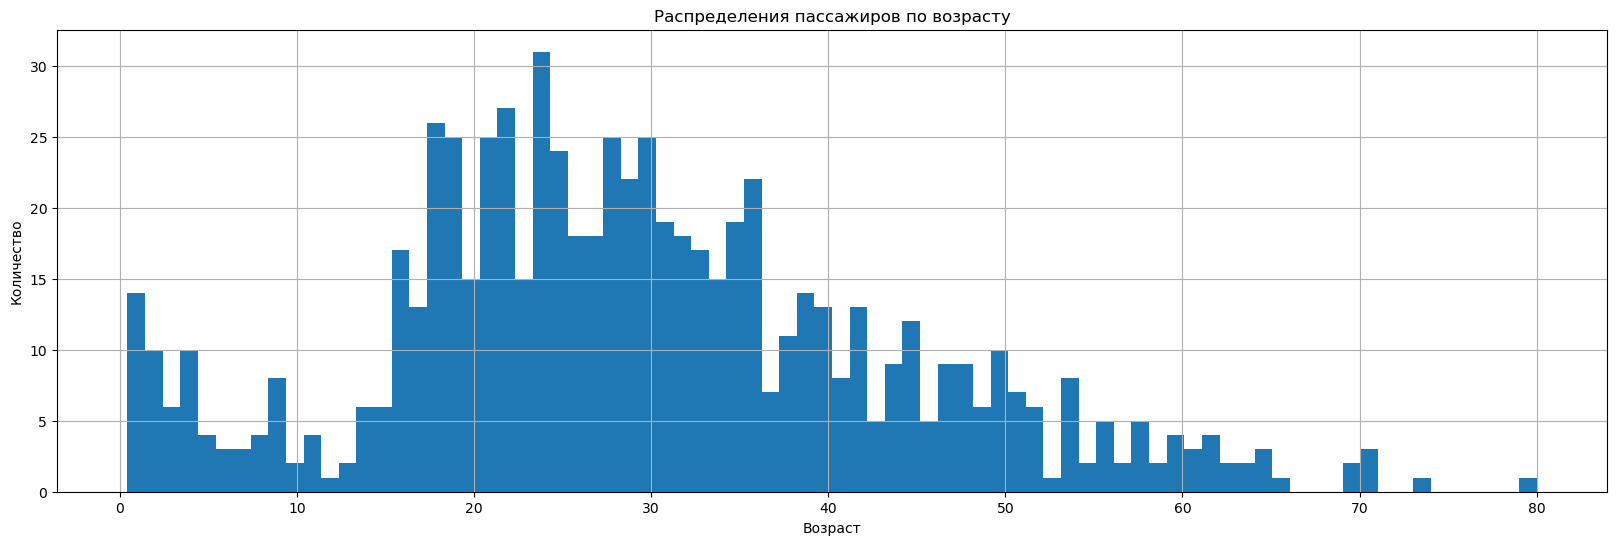

In [8]:
custom_hist(training_set["Age"], 'Распределения пассажиров по возрасту', 'Возраст')

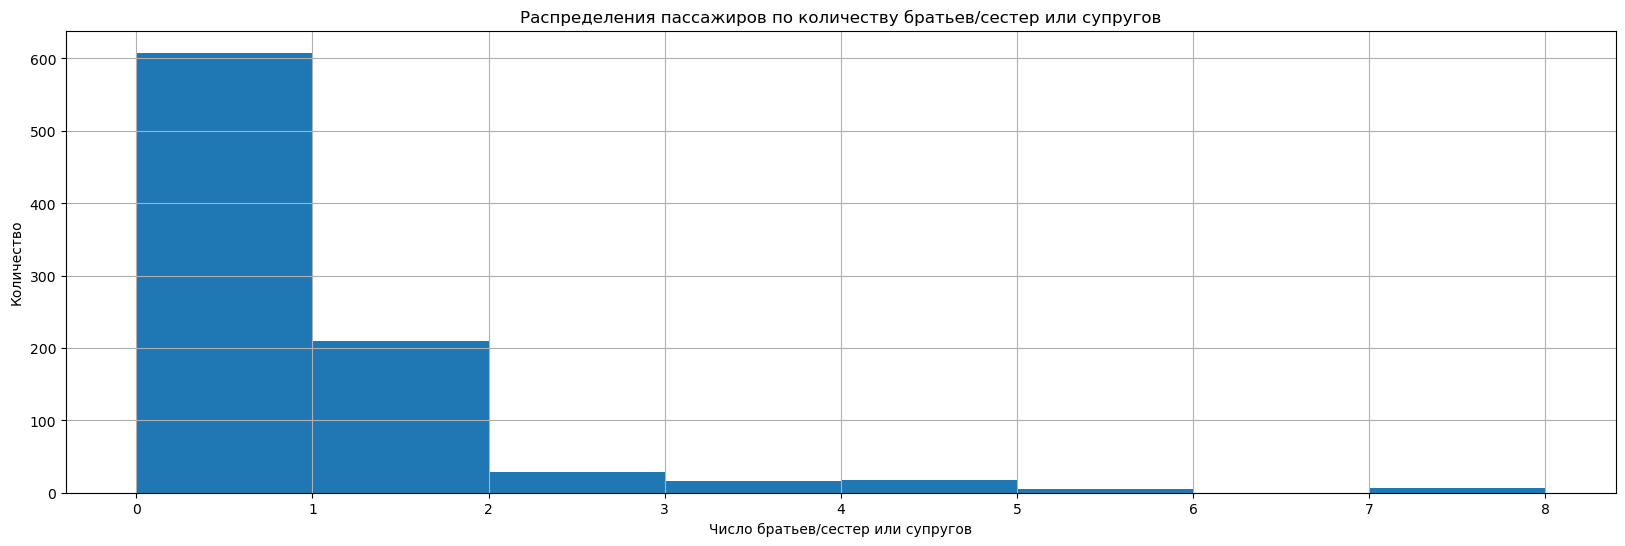

In [9]:
custom_hist(training_set["SibSp"], 'Распределения пассажиров по количеству братьев/сестер или супругов', 
  'Число братьев/сестер или супругов')

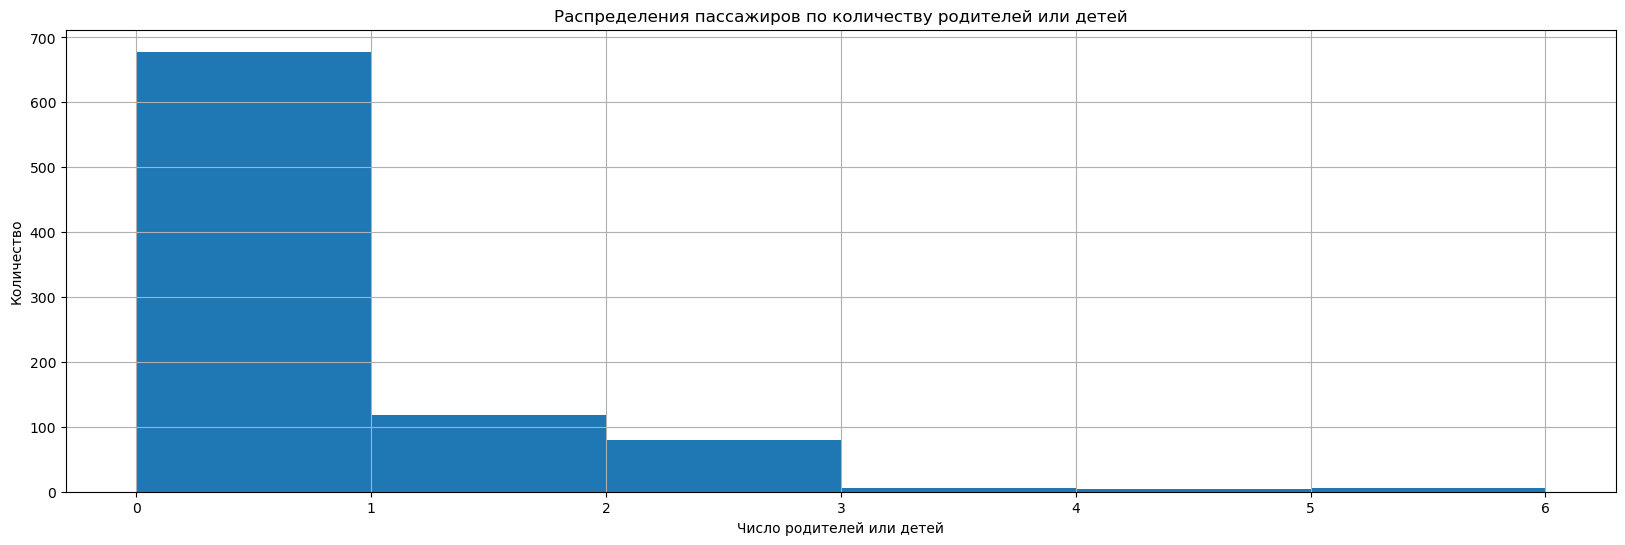

In [10]:
custom_hist(training_set["Parch"], 'Распределения пассажиров по количеству родителей или детей', 
  'Число родителей или детей')

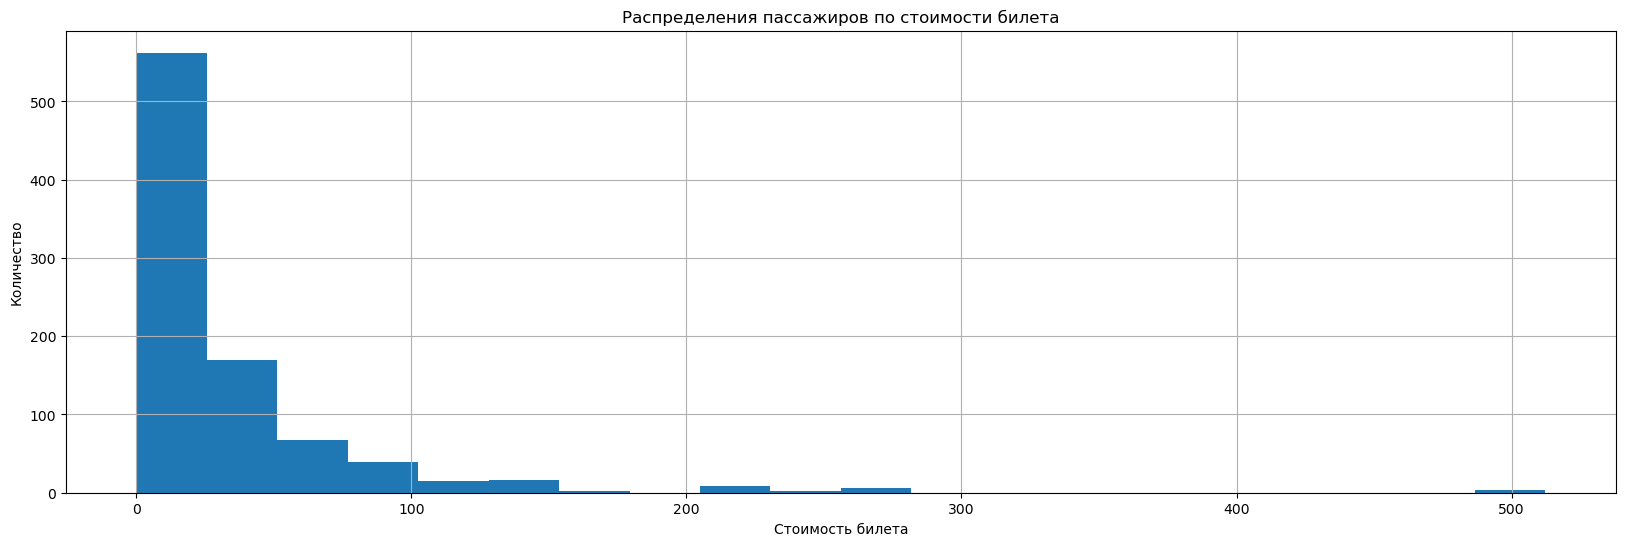

In [11]:
custom_hist(training_set["Fare"], 'Распределения пассажиров по стоимости билета', 
  'Стоимость билета', bins=20)

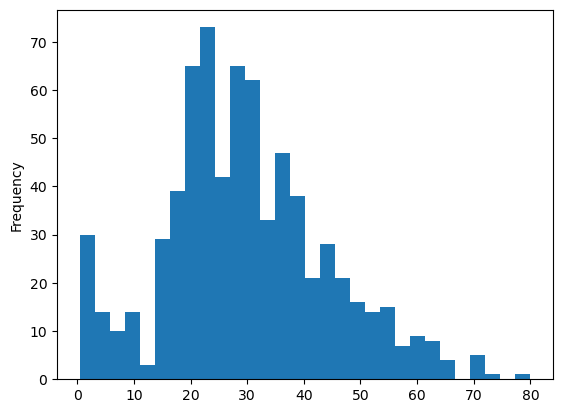

In [12]:
training_set['Age'].plot.hist(bins=30);

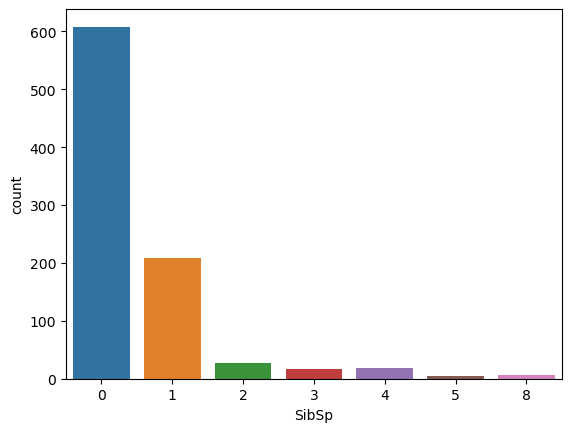

In [13]:
sns.countplot(x='SibSp', data=training_set);

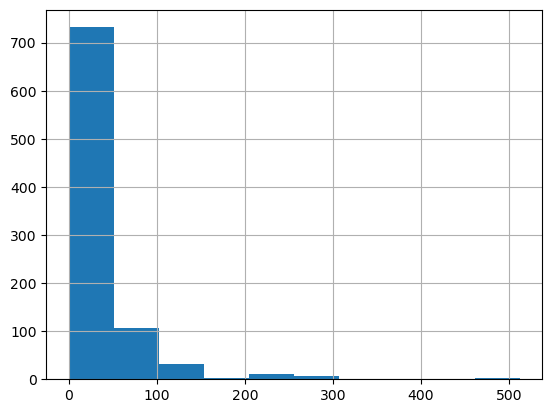

In [14]:
training_set['Fare'].hist();

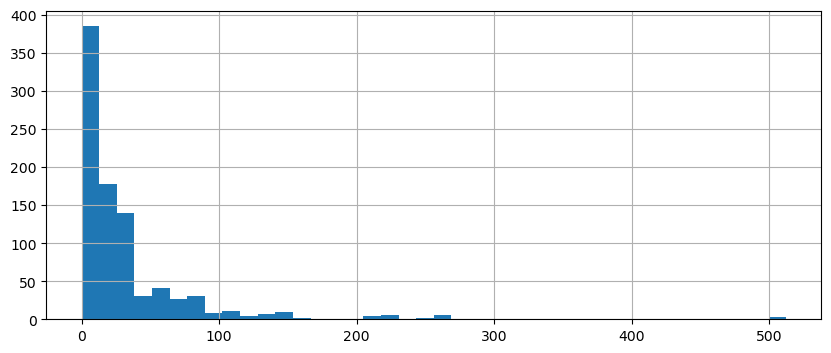

In [15]:
training_set['Fare'].hist(bins=40, figsize=(10,4));

***3. Проанализируйте влияние каждого признака на целевую переменную. Проиллюстрируйте ее графиками.***

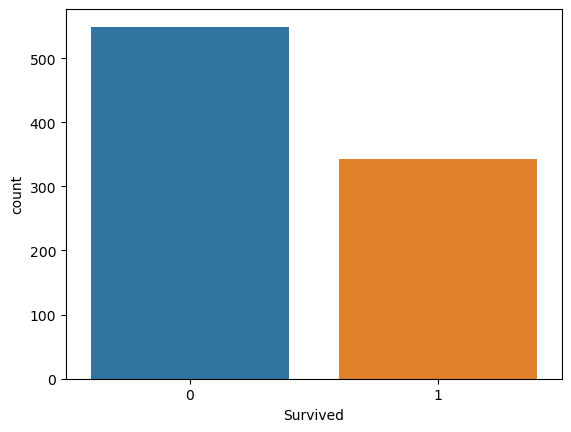

In [16]:
sns.countplot(x='Survived', data=training_set);

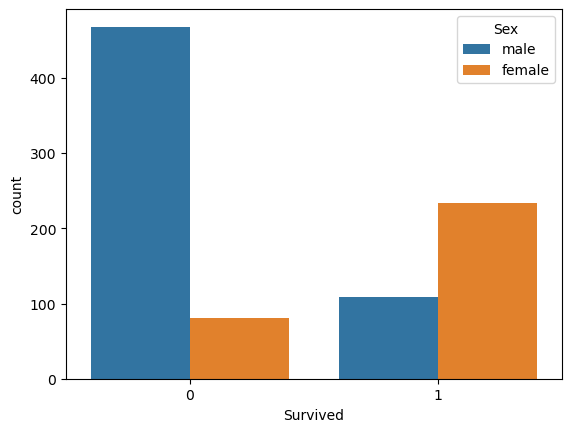

In [17]:
sns.countplot(x='Survived', data=training_set, hue='Sex');

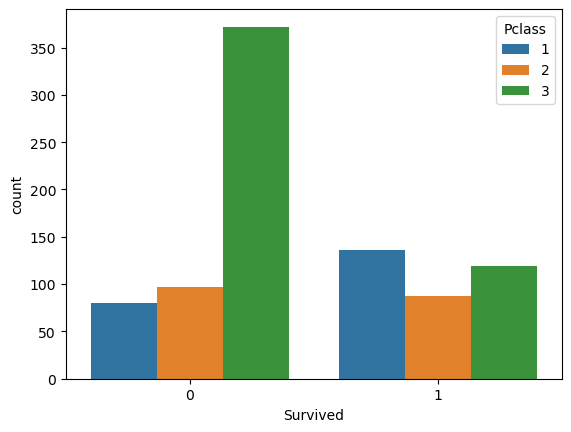

In [18]:
sns.countplot(x='Survived', data=training_set, hue='Pclass');

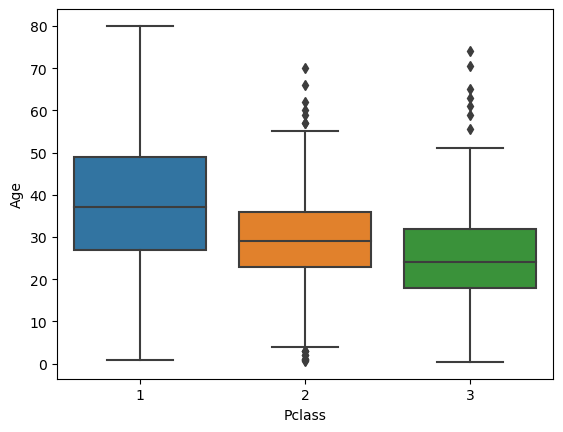

In [19]:
sns.boxplot(x='Pclass', y='Age', data=training_set);

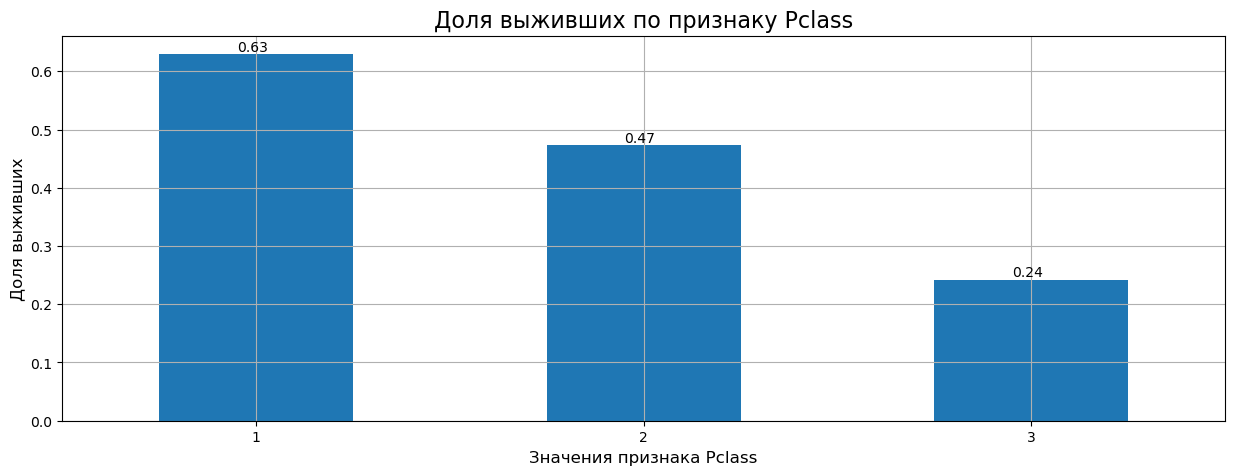

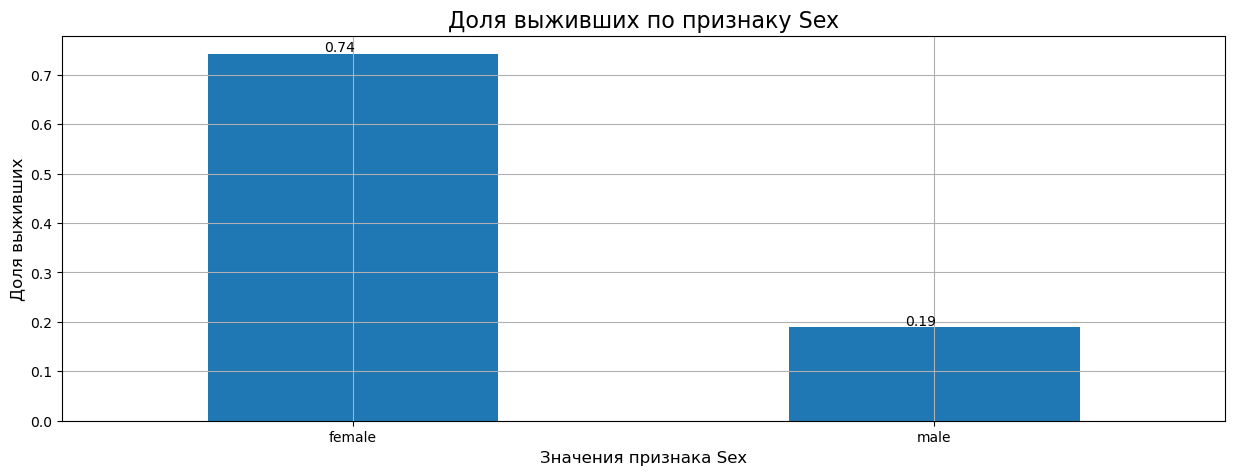

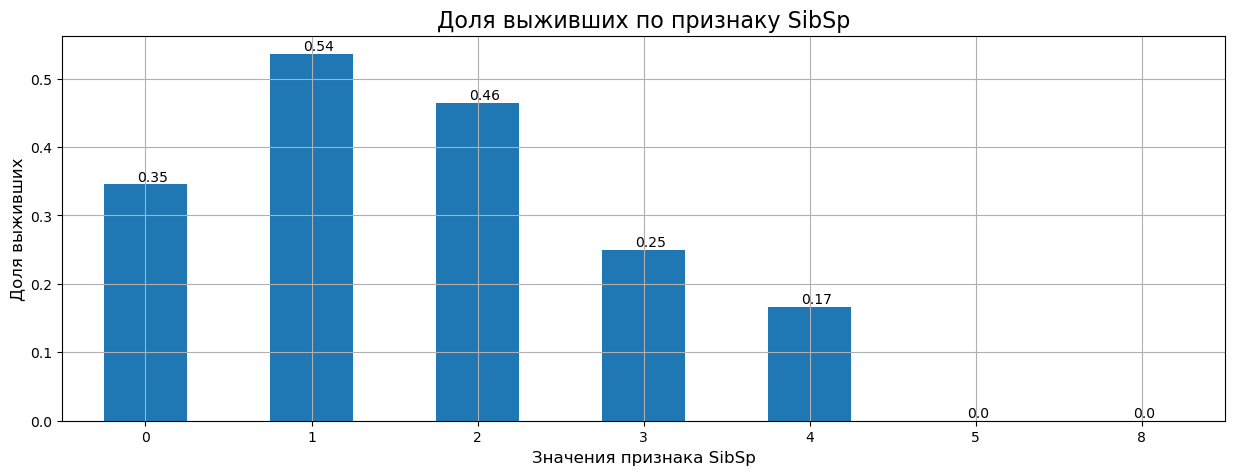

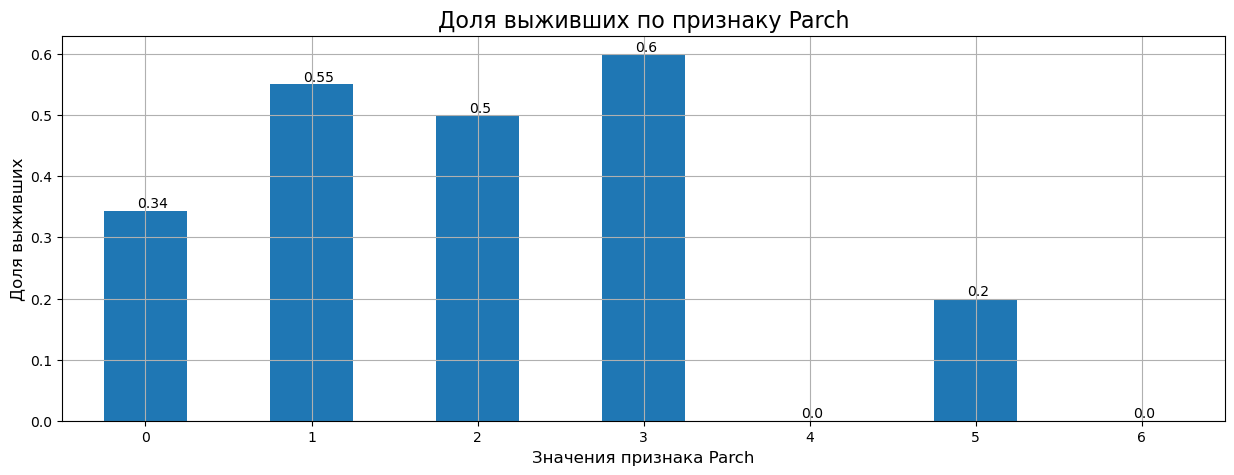

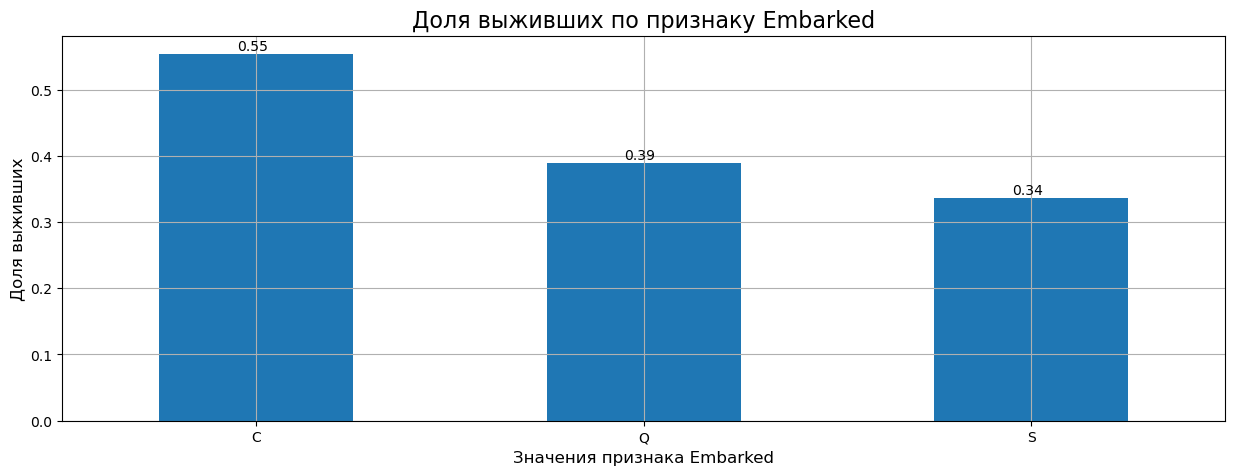

In [20]:
columns_to_look = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for column in columns_to_look:
    pivot = training_set.pivot_table(index=column, values='Survived', aggfunc='mean')
    
    fig, ax = plt.subplots(figsize=(15,5))
    ax.set_title(f'Доля выживших по признаку {column}', fontdict={'size': 16})
    ax.set_ylabel('Доля выживших', fontdict={'size': 12})
    ax.set_xlabel(column, fontdict={'size': 12})
    
    for cnt in range(pivot.shape[0]):
        value = pivot.iloc[cnt].values[0]
        ax.text(cnt - .05, value + .005, round(value, 2))
        
    pivot.plot(kind='bar', rot=0, grid=True, legend=False, ax=ax) 
    ax.set_xlabel(f'Значения признака {column}', fontdict={'size': 12})
    plt.show()

***4. Исследуйте и исправьте при необходимости пропущенные значения в датасете.***

### Работа с пропусками

In [21]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Пропуски Age, Cabin, Embarked

In [22]:
training_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

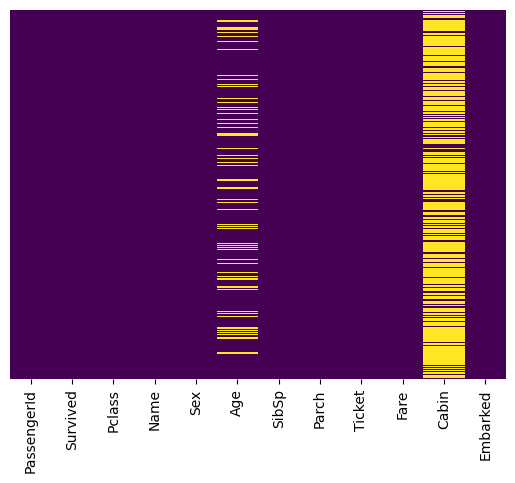

In [23]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='viridis');

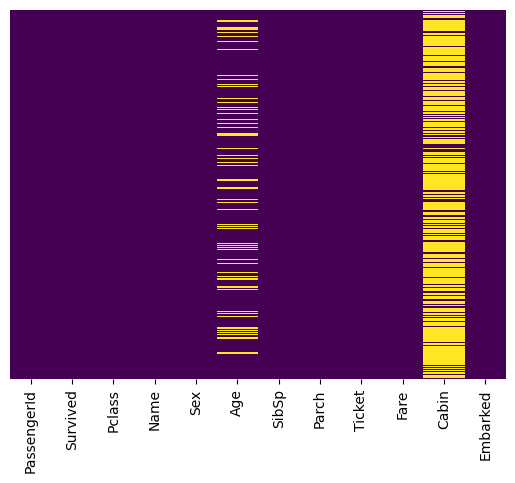

In [24]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='viridis');

Слишком много пропусков в Cabin, поэтому удаляем. 

In [25]:
training_set.drop('Cabin', axis=1, inplace=True)

In [26]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [27]:
training_set.dropna(inplace=True)

In [28]:
training_set.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Переведение категориальных значений в числовые

In [29]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

Работаем с Embarked

In [30]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(training_set[['Embarked']])  # Вызываем метод fit_transform, возвращает разреженную матрицу из библиотеки Scipy 

In [31]:
cat_enc_ohe.shape

(712, 3)

In [32]:
emb = pd.get_dummies(training_set['Embarked'])
emb.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [33]:
sex = pd.get_dummies(training_set['Sex'])
sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [34]:
sex = pd.get_dummies(training_set['Sex'], drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [35]:
embark = pd.get_dummies(training_set['Embarked'], drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [36]:
training_set = pd.concat([training_set, sex, embark], axis=1)

Удаляем ненужные столбцы

In [37]:
training_set.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [38]:
training_set.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Camera dataset

In [39]:
df = pd.read_csv('camera_dataset.csv')
df.head()

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model                    1038 non-null   object 
 1   Release date             1038 non-null   int64  
 2   Max resolution           1038 non-null   float64
 3   Low resolution           1038 non-null   float64
 4   Effective pixels         1038 non-null   float64
 5   Zoom wide (W)            1038 non-null   float64
 6   Zoom tele (T)            1038 non-null   float64
 7   Normal focus range       1038 non-null   float64
 8   Macro focus range        1037 non-null   float64
 9   Storage included         1036 non-null   float64
 10  Weight (inc. batteries)  1036 non-null   float64
 11  Dimensions               1036 non-null   float64
 12  Price                    1038 non-null   float64
dtypes: float64(11), int64(1), object(1)
memory usage: 105.5+ KB


In [41]:
df.isnull().sum()

Model                      0
Release date               0
Max resolution             0
Low resolution             0
Effective pixels           0
Zoom wide (W)              0
Zoom tele (T)              0
Normal focus range         0
Macro focus range          1
Storage included           2
Weight (inc. batteries)    2
Dimensions                 2
Price                      0
dtype: int64

In [42]:
df.drop('Model', axis=1, inplace=True)

In [43]:
df['Macro focus range'].fillna(df['Macro focus range'].mean(), inplace=True)
df['Storage included'].fillna(df['Storage included'].mean(), inplace=True)
df['Weight (inc. batteries)'].fillna(df['Weight (inc. batteries)'].mean(), inplace=True)
df['Dimensions'].fillna(df['Dimensions'].mean(), inplace=True)

In [44]:
df.isnull().sum()

Release date               0
Max resolution             0
Low resolution             0
Effective pixels           0
Zoom wide (W)              0
Zoom tele (T)              0
Normal focus range         0
Macro focus range          0
Storage included           0
Weight (inc. batteries)    0
Dimensions                 0
Price                      0
dtype: int64

### DATA.csv

In [45]:
df = pd.read_csv('data.csv')

In [46]:
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [47]:
df.shape

(10000, 20)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [49]:
df.isnull().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [50]:
df.drop(['LifeSquare', 'Healthcare_1', 'Id'], axis=1, inplace=True)

In [51]:
df.head()

,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
0,27,3.0,115.027311,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,0,0,B,305018.871089
1,22,1.0,39.832524,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1,0,B,177734.553407
2,1,3.0,78.342215,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,3,1,B,282078.720850
3,1,1.0,40.409907,1.0,10,22.0,1977,0.007122,B,B,1,264,0,0,1,B,168106.007630
4,94,2.0,64.285067,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,0,6,B,343995.102962


In [52]:
df.isnull().sum()

DistrictId       0
Rooms            0
Square           0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price            0
dtype: int64

In [53]:
df.Ecology_3.unique()

array(['B', 'A'], dtype=object)

In [54]:
df.Ecology_2.unique()

array(['B', 'A'], dtype=object)

In [55]:
df.Shops_2.unique()

array(['B', 'A'], dtype=object)

In [56]:
Ecology_2 = pd.get_dummies(df['Ecology_2'], prefix='Ecology_2_num', drop_first=True)
Ecology_2.head()

,Ecology_2_num_B
0,1
1,1
2,1
3,1
4,1


In [57]:
Ecology_3 = pd.get_dummies(df['Ecology_2'], prefix='Ecology_3_num', drop_first=True)
Ecology_3.head()

,Ecology_3_num_B
0,1
1,1
2,1
3,1
4,1


In [58]:
Shops_2 = pd.get_dummies(df['Shops_2'], prefix='Shops_2_num', drop_first=True)
Shops_2.head()

,Shops_2_num_B
0,1
1,1
2,1
3,1
4,1


In [59]:
df = pd.concat([df, Ecology_2, Ecology_3, Shops_2], axis=1)
df.head()

,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_num_B,Ecology_3_num_B,Shops_2_num_B
0,27,3.0,115.027311,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,0,0,B,305018.871089,1,1,1
1,22,1.0,39.832524,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1,0,B,177734.553407,1,1,1
2,1,3.0,78.342215,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,3,1,B,282078.720850,1,1,1
3,1,1.0,40.409907,1.0,10,22.0,1977,0.007122,B,B,1,264,0,0,1,B,168106.007630,1,1,1
4,94,2.0,64.285067,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,0,6,B,343995.102962,1,1,1


In [60]:
df.drop(['Ecology_2', 'Ecology_3', 'Shops_2'], axis=1, inplace=True)

In [61]:
df.head()

,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price,Ecology_2_num_B,Ecology_3_num_B,Shops_2_num_B
0,27,3.0,115.027311,10.0,4,10.0,2014,0.075424,11,3097,0,0,0,305018.871089,1,1,1
1,22,1.0,39.832524,8.0,7,8.0,1966,0.118537,30,6207,1,1,0,177734.553407,1,1,1
2,1,3.0,78.342215,10.0,2,17.0,1988,0.025609,33,5261,0,3,1,282078.720850,1,1,1
3,1,1.0,40.409907,1.0,10,22.0,1977,0.007122,1,264,0,0,1,168106.007630,1,1,1
4,94,2.0,64.285067,9.0,16,16.0,1972,0.282798,33,8667,2,0,6,343995.102962,1,1,1


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DistrictId       10000 non-null  int64  
 1   Rooms            10000 non-null  float64
 2   Square           10000 non-null  float64
 3   KitchenSquare    10000 non-null  float64
 4   Floor            10000 non-null  int64  
 5   HouseFloor       10000 non-null  float64
 6   HouseYear        10000 non-null  int64  
 7   Ecology_1        10000 non-null  float64
 8   Social_1         10000 non-null  int64  
 9   Social_2         10000 non-null  int64  
 10  Social_3         10000 non-null  int64  
 11  Helthcare_2      10000 non-null  int64  
 12  Shops_1          10000 non-null  int64  
 13  Price            10000 non-null  float64
 14  Ecology_2_num_B  10000 non-null  uint8  
 15  Ecology_3_num_B  10000 non-null  uint8  
 16  Shops_2_num_B    10000 non-null  uint8  
dtypes: float64(6)

In [63]:
X = df.drop(columns=['Price'])
y = df['Price']

## Постройте по получившемуся набору данных простую модель машинного обучения и оцените ее эффективность.

In [64]:
training_set

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,0,1,0
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [65]:
X = training_set.drop(columns=['Survived'])
y = training_set['Survived']

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [67]:
from sklearn.metrics import f1_score, recall_score, precision_score

In [68]:
print(f"Test f1_score {f1_score(y_test, model.predict(X_test))}")
print(f"Test recall_score {recall_score(y_test, model.predict(X_test))}")
print(f"Test precision_score {precision_score(y_test, model.predict(X_test))}")

Test f1_score 0.7485380116959065
Test recall_score 0.6956521739130435
Test precision_score 0.810126582278481


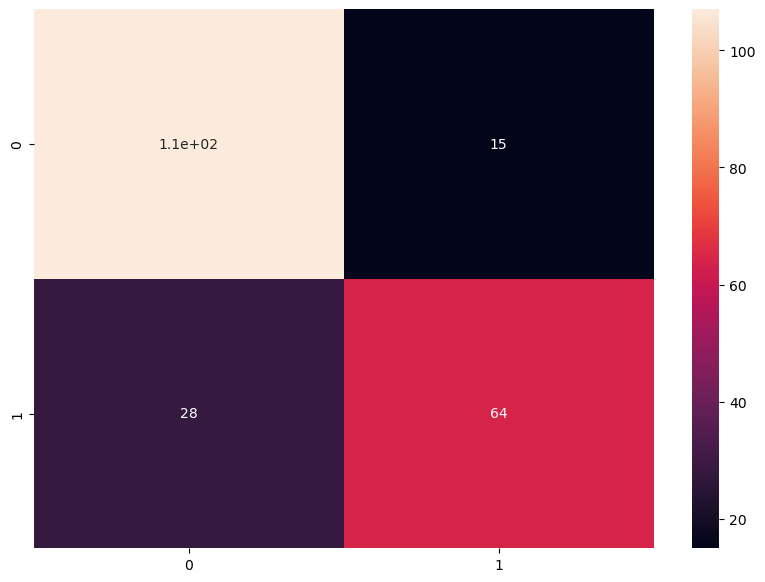

In [69]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot=True);

Посчитайте, насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров. Также проверьте наличие этой зависимости визуально (в этом вам поможет построение диаграммы рассеяния).

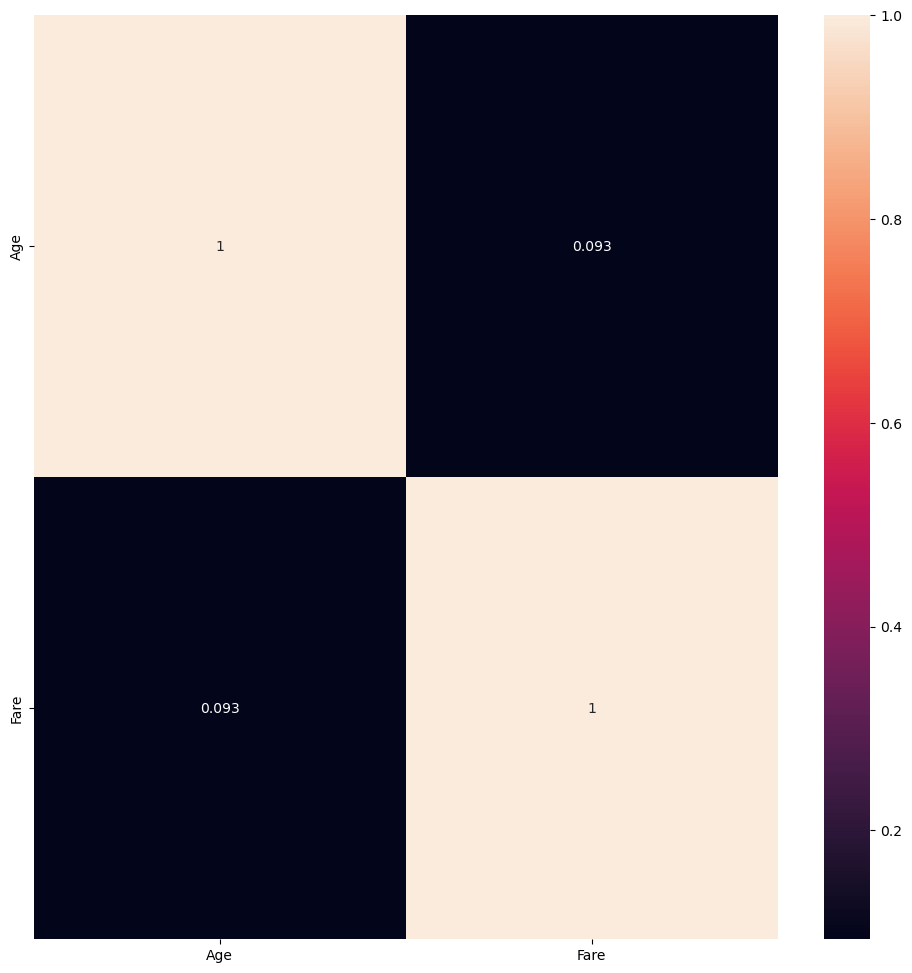

In [70]:
plt.figure(figsize=(12, 12))
sns.heatmap(training_set[['Age', 'Fare']].corr(), annot=True);

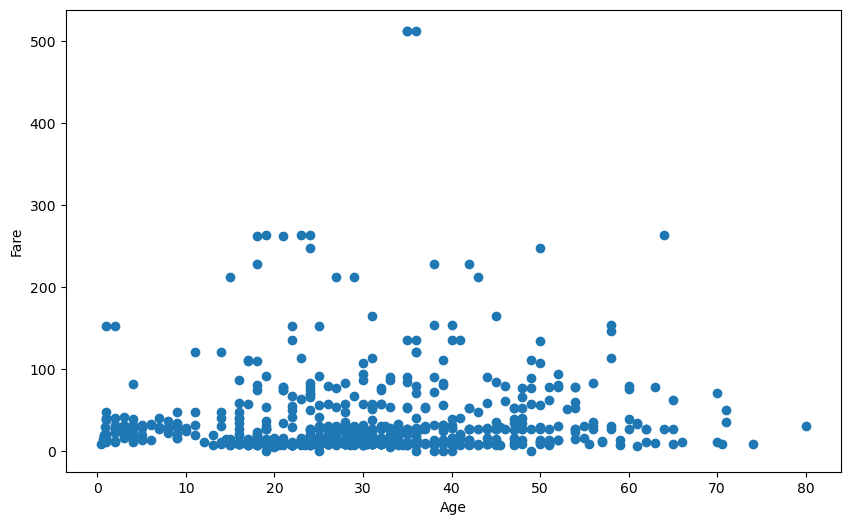

In [71]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = training_set['Age'], y = training_set['Fare'])
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

Коэффициент корреляции между ценой за билет и возрастом пассажиров - 0.093, это очень положительное маленькое число, поэтому связь между ценой и возрастом прямая и очень слабая.

## Правда ли, что чаще выживали пассажиры с более дорогими билетами?

### А есть ли зависимость выживаемости от класса?

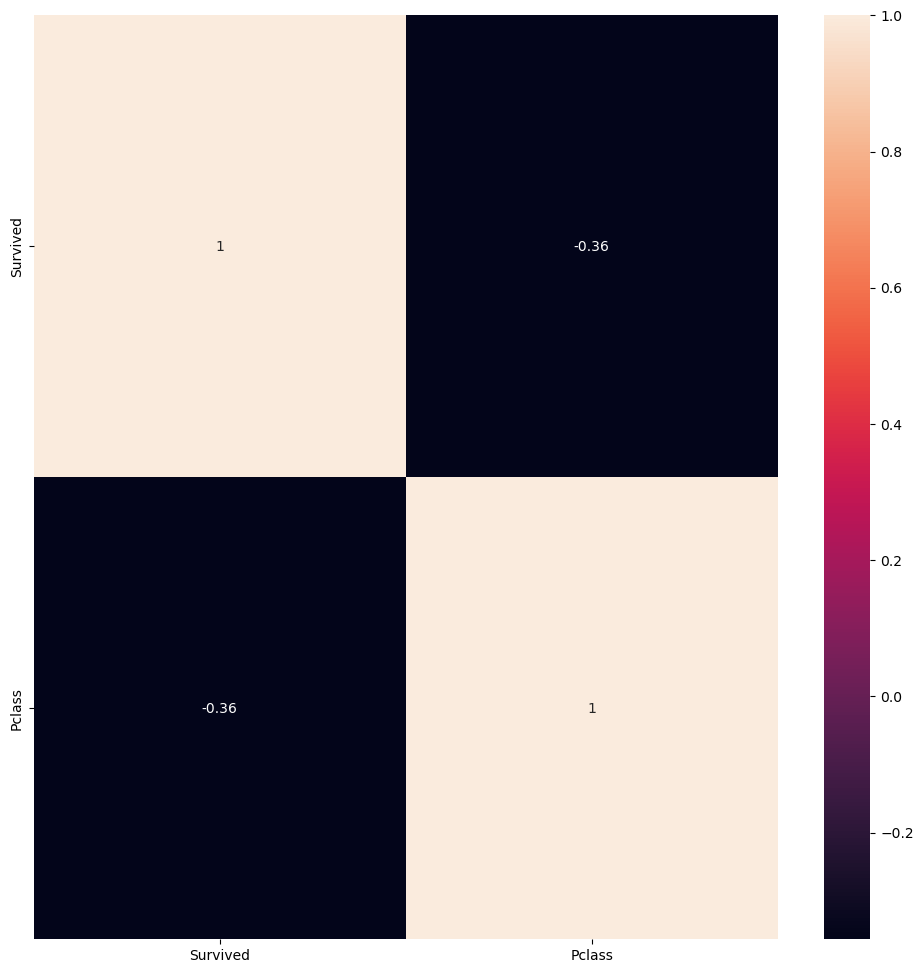

In [72]:
plt.figure(figsize=(12, 12))
sns.heatmap(training_set[['Survived', 'Pclass']].corr(), annot=True);

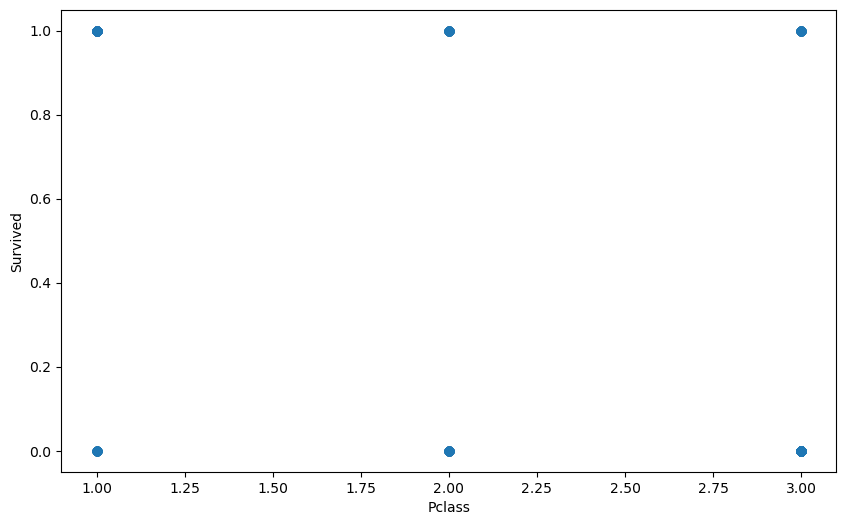

In [73]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = training_set['Pclass'], y = training_set['Survived'])
plt.xlabel("Pclass")
plt.ylabel("Survived")
plt.show()

# Домашнее задание

7. Правда ли, что чаще выживали пассажиры с более дорогими билетами? А есть ли зависимость выживаемости от класса?
1. Какова связь между стоимостью билета и портом отправления? Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне. 
1. Выведите гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки.
1. Оцените репрезентативность представленной выборки. Сколько всего было пассажиров Титаника? Сколько из них выжило? Какую долю составляет представленный набор данных от всей генеральной совокупности?
1. Разделите выборку на тестовую и обучающую части при помощи train_test_split(). Изобразите на графиках распределение некоторых атрибутов и целевой переменной. Насколько однородно получившееся разбиение?
1. Сбалансируйте классы в исходном датасете двумя способами:
1. Удалите лишние объекты мажоритарного класса (выбранные случайно)
1. Добавьте в выборку дубликаты миноритарного класса.
1. Проведите исследование эффективности простой модели классификации до и после данных преобразований.
1. Постройте корреляционную матрицу признаков после преобразования данных. Сделайте вывод о наличии либо отсутствии мультиколлинеарности признаков.
1. Проведите группировку данных по значению возраста. Введите новый признак "возрастная категория", значениями которой будут "ребенок", "взрослый", "старик". Проведите анализ эффективности данного признака.

### 7. Правда ли, что чаще выживали пассажиры с более дорогими билетами? А есть ли зависимость выживаемости от класса?

Правда ли, что чаще выживали пассажиры с более дорогими билетами?

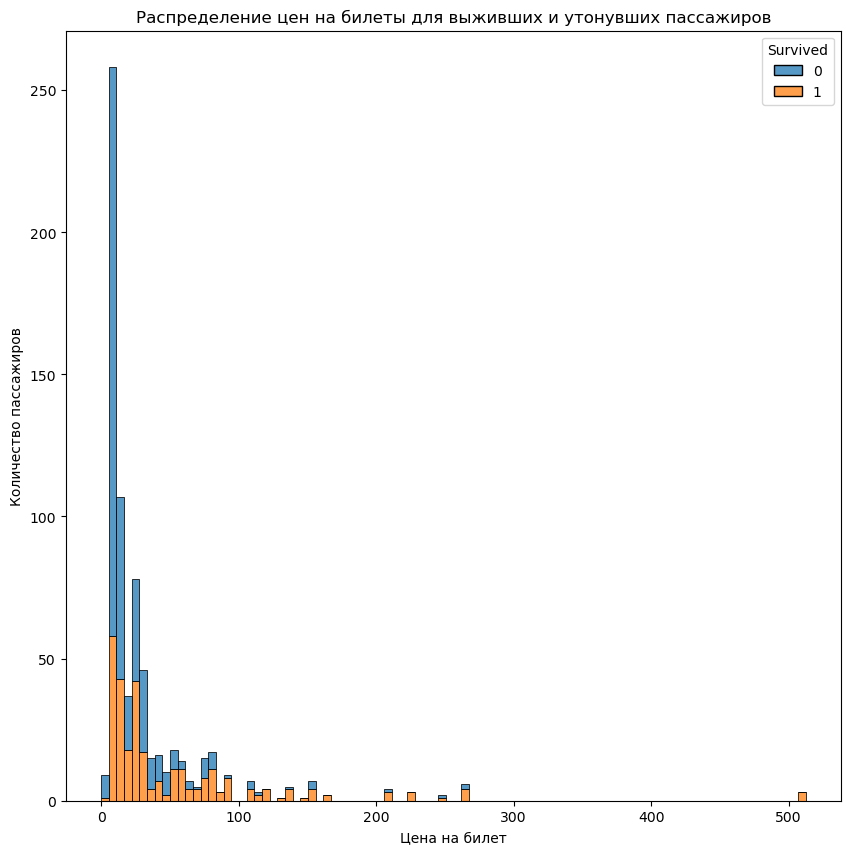

In [74]:
plt.figure(figsize=(10, 10))
sns.histplot(data=training_set, x="Fare", hue="Survived", multiple="stack")
plt.title("Распределение цен на билеты для выживших и утонувших пассажиров")
plt.xlabel("Цена на билет")
plt.ylabel("Количество пассажиров")
plt.show()

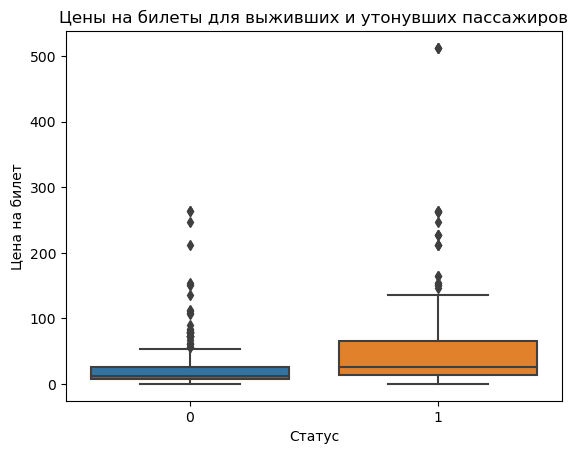

In [75]:
sns.boxplot(data=training_set, x="Survived", y="Fare")
plt.title("Цены на билеты для выживших и утонувших пассажиров")
plt.xlabel("Статус")
plt.ylabel("Цена на билет")
plt.show()

По графикам можно сделать вывод, что предположение, что чаще выживали пассажиры с более дорогими билетами - правда.
- На первом графике - чем больше цена, тем выше оранжевые (кол-во выживших) столбики; чем цена меньше, тем голубые(кол-во невыживших) столбики больше;
- На втором графике видно, что медиана цены билета невыживших меньше медианы выживших, также распределение от 25% квантиля до 75% квантиля цены билета больше у выживших, кроме того, максимальная и минимальная цена билета тоже выше у выживших пассажиров.

А есть ли зависимость выживаемости от класса?

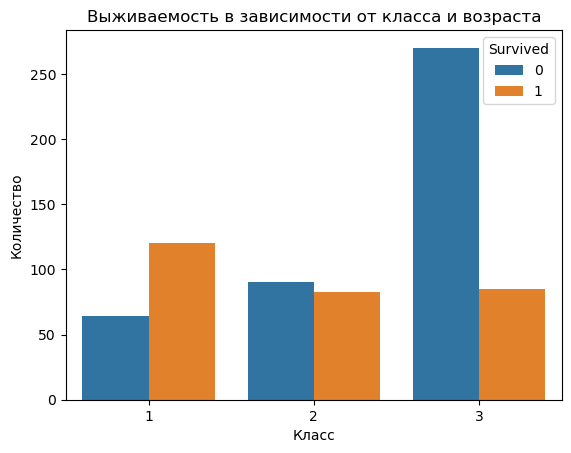

In [76]:
sns.countplot(x="Pclass", hue="Survived", data=training_set)
plt.xlabel("Класс")
plt.ylabel("Количество")
plt.title("Выживаемость в зависимости от класса и возраста");

По графику можно сказать, что есть некая зависимость выживаемости от класса - при понижении премиальности класса количество выживших уменьшается, а количество невыживших увеличивается

### 8. Какова связь между стоимостью билета и портом отправления? Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне

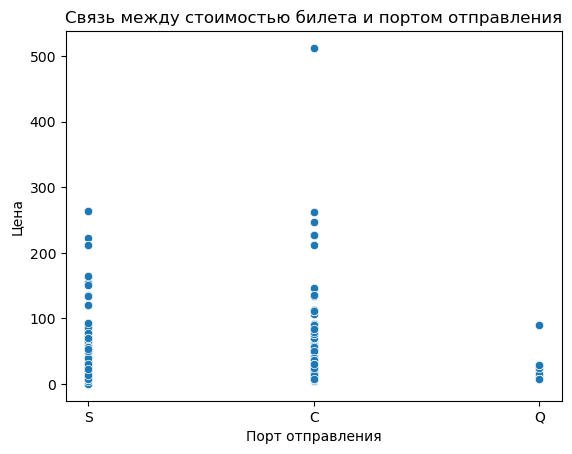

In [77]:
titanic = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023_new/ML5.4%20EDA/titanic.csv')
sns.scatterplot(x="Embarked", y="Fare", data=titanic)
plt.xlabel("Порт отправления")
plt.ylabel("Цена")
plt.title("Связь между стоимостью билета и портом отправления");

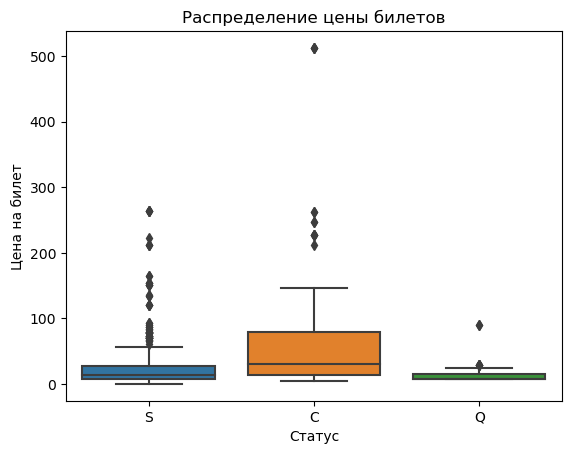

In [78]:
sns.boxplot(data=titanic, x="Embarked", y="Fare")
plt.title("Распределение цены билетов")
plt.xlabel("Статус")
plt.ylabel("Цена на билет");

Вывод: есть некая зависимость между стоимостью билета и портом отправления. На графиках распределения билетов мы можем наблюдать, что в порту Cherbourg билеты дороже(меидана, максимальная и минимальная цена билетов выше, чем у остальных, так же выбросы преимущественно выше, по сравнению с другими портами). "На втором месте" порт Southampton, а самые дешёвые билеты были проданы в порту Queenstown.

Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд.

In [79]:
ticket_cost_by_embarked = titanic.groupby("Embarked")["Fare"].agg(["min", "mean", "max"])
df8 = pd.DataFrame(ticket_cost_by_embarked)
df8

,min,mean,max
Embarked,,,
C,4.0125,59.954144,512.3292
Q,6.7500,13.276030,90.0000
S,0.0000,27.079812,263.0000


Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне

In [80]:
df8.loc["S"]

min       0.000000
mean     27.079812
max     263.000000
Name: S, dtype: float64

### 9. Выведите гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки.

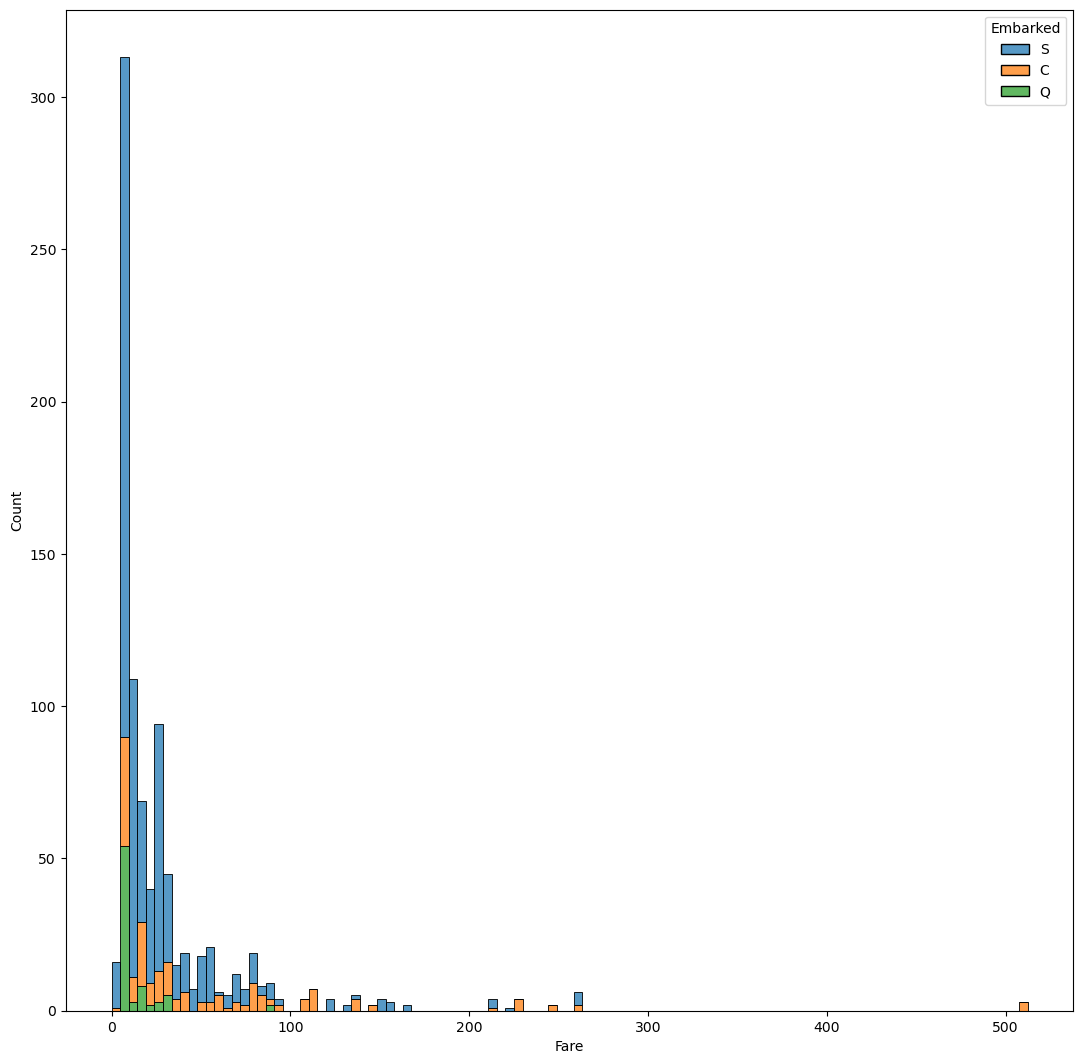

In [81]:
plt.figure(figsize=(13, 13))
sns.histplot(data=titanic, x="Fare", hue="Embarked", multiple="stack");

### 10. Оцените репрезентативность представленной выборки. Сколько всего было пассажиров Титаника? Сколько из них выжило? Какую долю составляет представленный набор данных от всей генеральной совокупности?

***Сколько всего было пассажиров Титаника?***

- __Всего было 1317 пассажиров__

Сколько из них выжило?

- __499 пассажиров выжило__

Какую долю составляет представленный набор данных от всей генеральной совокупности?

- __В представленном наборе есть данные о 891 пассажире; Значит доля составляет $\frac{891}{1317} = 0,6765$   или 67,65%__

### 11. Разделите выборку на тестовую и обучающую части при помощи train_test_split(). Изобразите на графиках распределение некоторых атрибутов и целевой переменной. Насколько однородно получившееся разбиение?

Разделите выборку на тестовую и обучающую части при помощи train_test_split().

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Изобразите на графиках распределение некоторых атрибутов и целевой переменной.

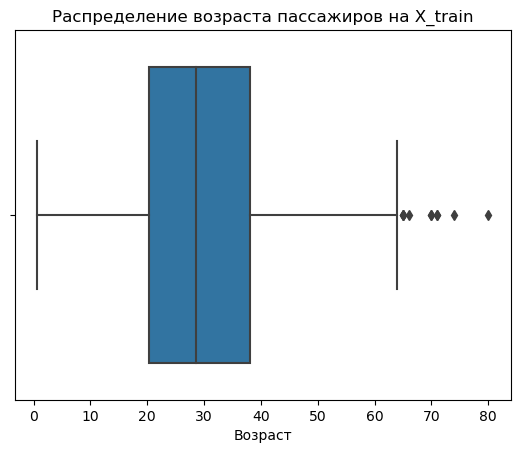

In [83]:
sns.boxplot(data=X_train, x="Age")
plt.title("Распределение возраста пассажиров на X_train")
plt.xlabel("Возраст");

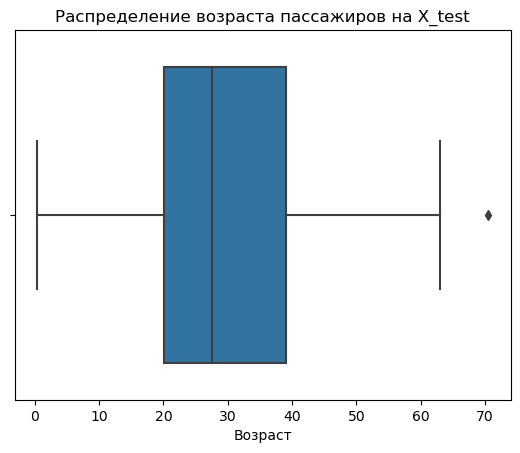

In [84]:
sns.boxplot(data=X_test, x="Age")
plt.title("Распределение возраста пассажиров на X_test")
plt.xlabel("Возраст");

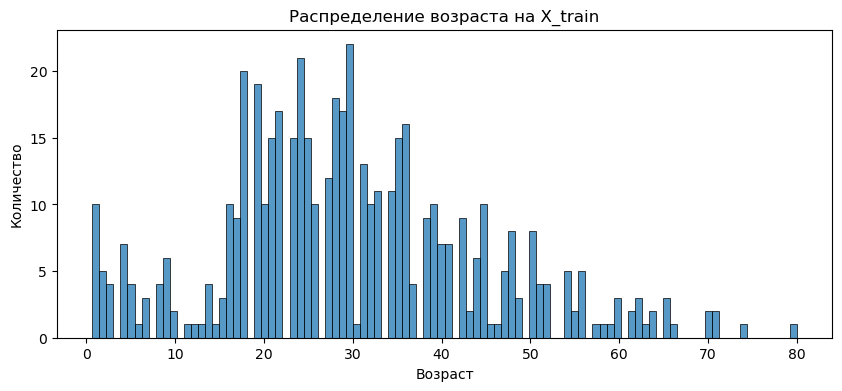

In [85]:
plt.figure(figsize=(10,4))
sns.histplot(X_train['Age'], bins=100)
plt.title('Распределение возраста на X_train')
plt.xlabel('Возраст')
plt.ylabel('Количество');

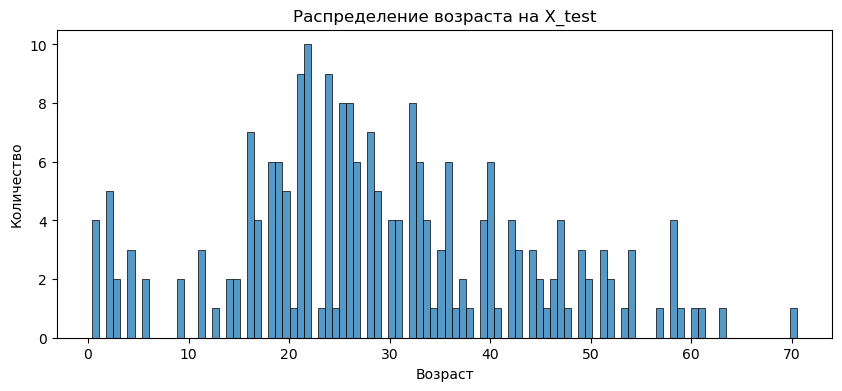

In [86]:
plt.figure(figsize=(10,4))
sns.histplot(X_test['Age'], bins=100)
plt.title('Распределение возраста на X_test')
plt.xlabel('Возраст')
plt.ylabel('Количество');

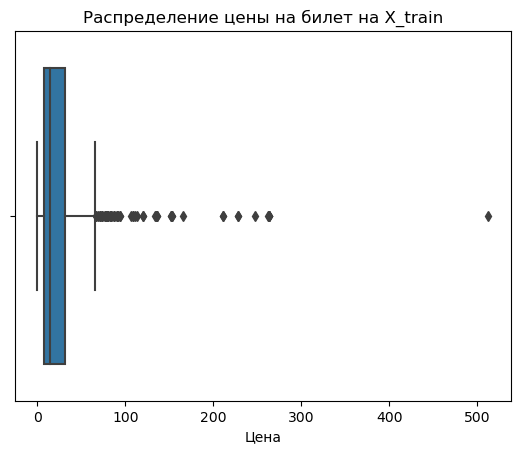

In [87]:
sns.boxplot(data=X_train, x="Fare")
plt.title("Распределение цены на билет на X_train")
plt.xlabel("Цена");

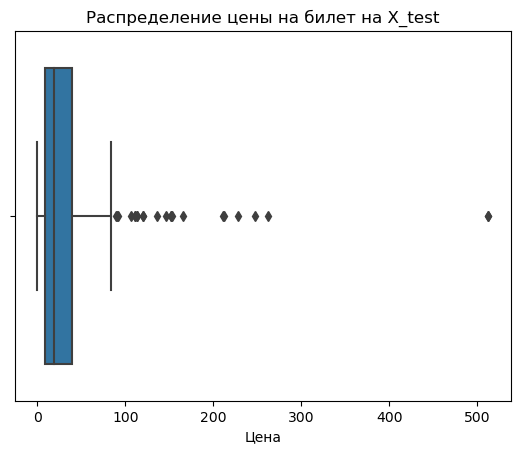

In [88]:
sns.boxplot(data=X_test, x="Fare")
plt.title("Распределение цены на билет на X_test")
plt.xlabel("Цена");

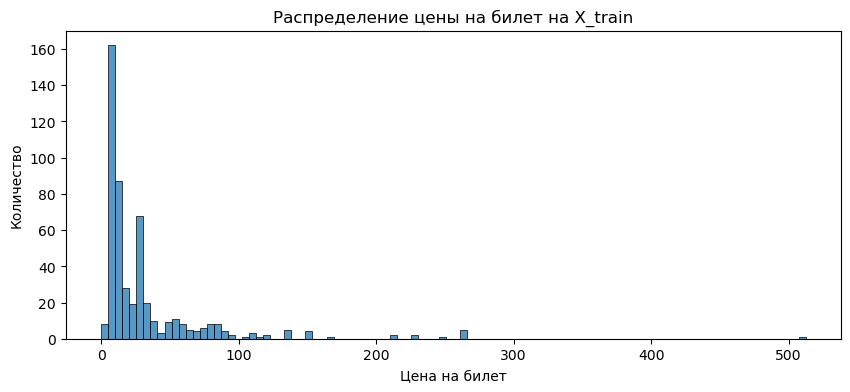

In [89]:
plt.figure(figsize=(10,4))
sns.histplot(X_train['Fare'], bins=100)
plt.title('Распределение цены на билет на X_train')
plt.xlabel('Цена на билет')
plt.ylabel('Количество');

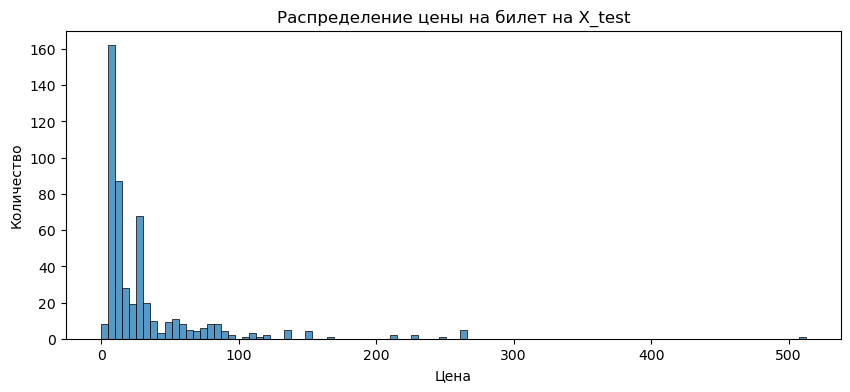

In [90]:
plt.figure(figsize=(10,4))
sns.histplot(X_train['Fare'], bins=100)
plt.title('Распределение цены на билет на X_test')
plt.xlabel('Цена')
plt.ylabel('Количество');

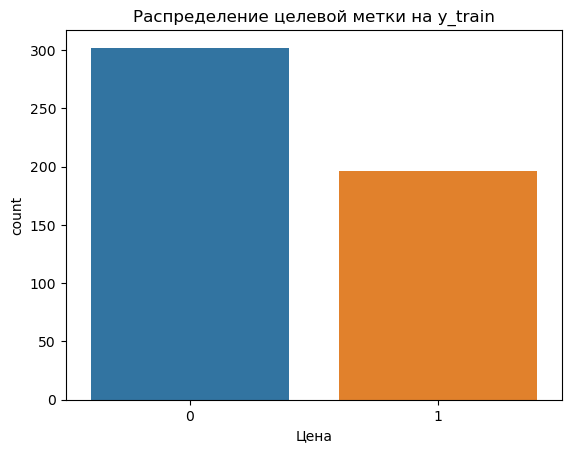

In [91]:
sns.countplot(data=pd.DataFrame(y_train), x='Survived')
plt.title("Распределение целевой метки на y_train")
plt.xlabel("Цена");

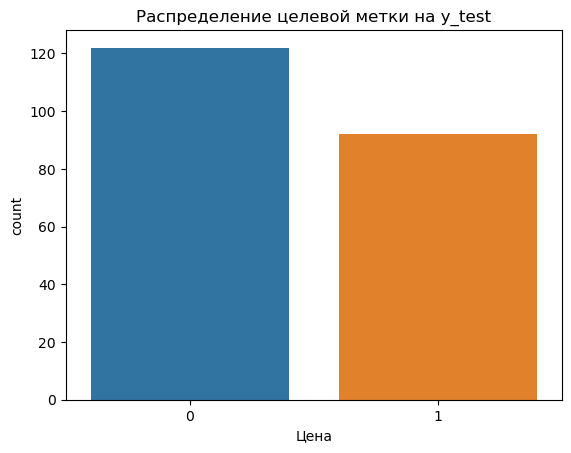

In [92]:
sns.countplot(data=pd.DataFrame(y_test), x='Survived')
plt.title("Распределение целевой метки на y_test")
plt.xlabel("Цена");

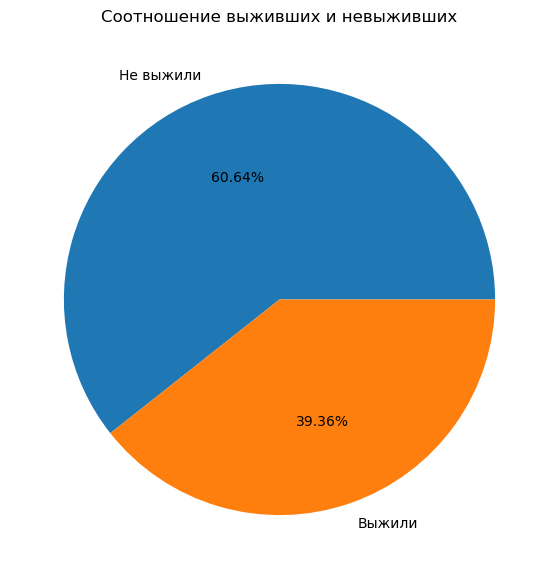

In [93]:
pd.DataFrame(y_train)["Survived"].value_counts().plot(
                 kind='pie',
                 title='Соотношение выживших и невыживших',
                 figsize=(7, 7),
                 autopct='%.2f%%',
                 labels=['Не выжили', 'Выжили'])
plt.ylabel('');

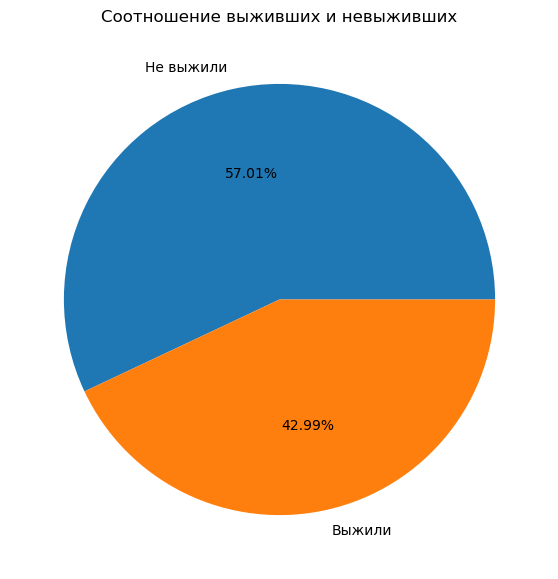

In [94]:
pd.DataFrame(y_test)["Survived"].value_counts().plot(
                 kind='pie',
                 title='Соотношение выживших и невыживших',
                 figsize=(7, 7),
                 autopct='%.2f%%',
                 labels=['Не выжили', 'Выжили'])
plt.ylabel('');

Насколько однородно получившееся разбиение?

- Визуально мы можем наблюдать, что распределение некоторых признаков и целевой метрики совпадает на тренировочной и обучающей выборке

### 12.  Сбалансируйте классы в исходном датасете двумя способами:
- Удалите лишние объекты мажоритарного класса (выбранные случайно)
- Добавьте в выборку дубликаты миноритарного класса.

### 13. Удалите лишние объекты мажоритарного класса (выбранные случайно)

In [95]:
y.value_counts() # кол-во каждого класса

0    424
1    288
Name: Survived, dtype: int64

In [96]:
count_class_0, count_class_1 = y.value_counts()
df_class_0 = X[y == 0] # создаём датафрейм для 0 метки
df_class_1 = X[y == 1] # создаём датафрейм для 1 метки
df_class_0_under = df_class_0.sample(count_class_1) # из большего датафрейма выбираем столько, сколько экземпляров в меньшем
X_1 = pd.concat([df_class_0_under, df_class_1], axis=0)
y_1 = pd.concat([pd.Series([0]*count_class_1), pd.Series([1]*count_class_1)])

### 14. Добавьте в выборку дубликаты миноритарного класса.

In [97]:
# Добавление в выборку дубликатов миноритарного класса
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
X_2 = pd.concat([df_class_0, df_class_1_over], axis=0)
y_2 = pd.concat([pd.Series([0]*count_class_0), pd.Series([1]*count_class_0)])

### 15. Проведите исследование эффективности простой модели классификации до и после данных преобразований.

In [98]:
from sklearn.metrics import classification_report

#### До преобразований:

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter=300)
model.fit(X_train, y_train)
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       122
           1       0.81      0.70      0.75        92

    accuracy                           0.80       214
   macro avg       0.80      0.79      0.79       214
weighted avg       0.80      0.80      0.80       214



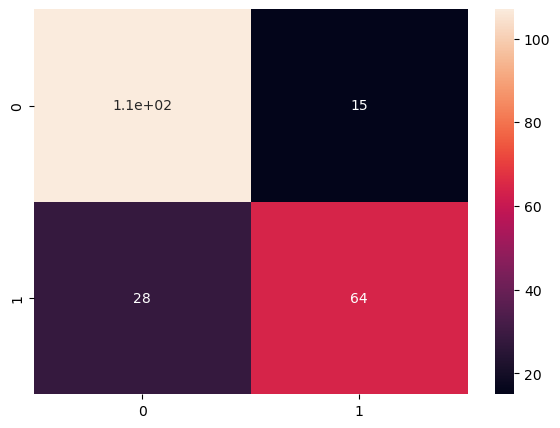

In [100]:
plt.figure(figsize = (7,5))
sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot=True);

#### После удаления лишних объектов мажоритарного класса:

In [101]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter=300)
model.fit(X_train_1, y_train_1)
print(classification_report(y_test_1, model.predict(X_test_1)))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80        93
           1       0.76      0.82      0.79        80

    accuracy                           0.80       173
   macro avg       0.80      0.80      0.80       173
weighted avg       0.80      0.80      0.80       173



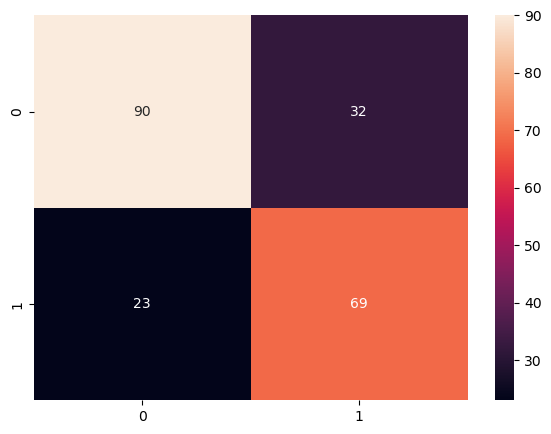

In [102]:
plt.figure(figsize = (7,5))
sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot=True);

### После добавления в выборку дубликатов миноритарного класса.

In [103]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter=300)
model.fit(X_train_2, y_train_2)
print(classification_report(y_test_2, model.predict(X_test_2)))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       122
           1       0.85      0.83      0.84       133

    accuracy                           0.84       255
   macro avg       0.84      0.84      0.84       255
weighted avg       0.84      0.84      0.84       255



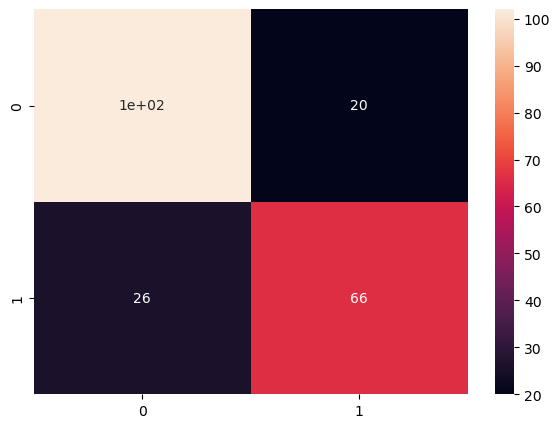

In [104]:
plt.figure(figsize = (7,5))
sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot=True);

Вывод: преобразования данных положительно влияют на метрики оценки простой модели, но незначительно. При удалении данных 2 метрики выросли на 1 процентный пункт. При добавлении данных в выборку результаты по всем метрикам стали на 3-4 процентных пункта выше.

### 16. Постройте корреляционную матрицу признаков после преобразования данных. Сделайте вывод о наличии либо отсутствии мультиколлинеарности признаков.

__До преобразований__

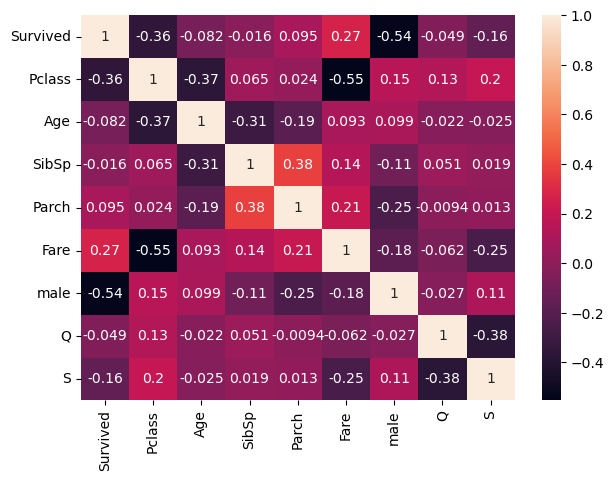

In [105]:
plt.figure(figsize = (7,5))
sns.heatmap(training_set.corr(), annot=True);

__После удаления лишних объектов__

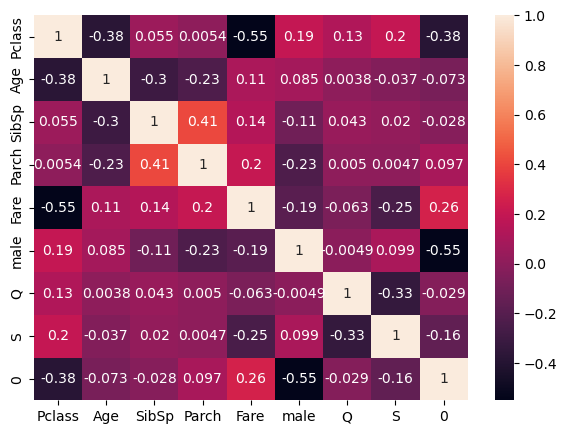

In [106]:
df_1 = pd.concat([X_1.reset_index(drop=True), y_1.reset_index(drop=True)], axis=1)
plt.figure(figsize = (7,5))
sns.heatmap(df_1.corr(), annot=True);

__После добавления новых объектов__

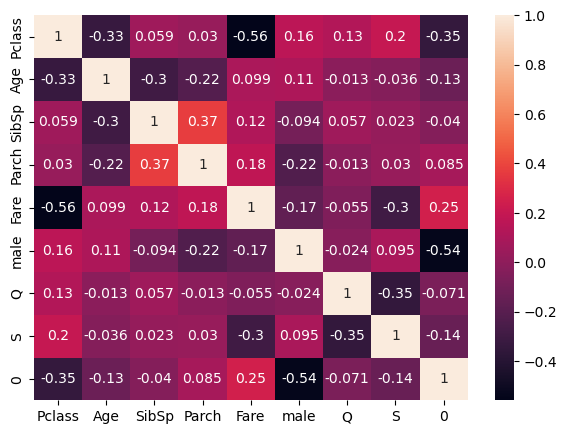

In [107]:
df_2 = pd.concat([X_2.reset_index(drop=True), y_2.reset_index(drop=True)], axis=1)
plt.figure(figsize = (7,5))
sns.heatmap(df_2.corr(), annot=True);

Вывод: мультиколлинеарность почти отсутствует - сильных связей между признаками нет, но есть небольшое количество (по 2-3) средних связей между признакми.

### 17. Проведите группировку данных по значению возраста. Введите новый признак "возрастная категория", значениями которой будут "ребенок", "взрослый", "старик". Проведите анализ эффективности данного признака.

In [108]:
def age_category(age):
    if age < 18:
        return 'ребенок'
    elif age < 60:
        return 'взрослый'
    else:
        return 'старик'

training_set['Age category'] = training_set['Age'].apply(age_category)

age_cat = pd.get_dummies(training_set['Age category'], drop_first=True)
training_set = pd.concat([training_set, age_cat], axis=1)
training_set.drop(columns=['Age category'], inplace=True)
training_set.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,ребенок,старик
0,0,3,22.0,1,0,7.2500,1,0,1,0,0
1,1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,0
3,1,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,0


In [109]:
X = training_set.drop(columns=['Survived'])
y = training_set['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=300)
model.fit(X_train, y_train)
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       122
           1       0.81      0.70      0.75        92

    accuracy                           0.80       214
   macro avg       0.80      0.79      0.79       214
weighted avg       0.80      0.80      0.80       214



Вывод: добавление этого признака никак не влияет на качество модели - результат абсолютно такой, что закономерно - мы добавляем коллинеарный с возрастом признак